# Curso Data Science do Zero - Minerando Dados

## 5º Capítulo: Pre-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [1]:
import pandas as pd

##### cojunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])

In [4]:
print(altura)

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]


##### verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

##### lendo a base de dados

In [6]:
dataset = pd.read_csv('/home/amador/Área de Trabalho/backup/DSZ/M07 - Pré-Processamento de Dados/materiais_apoio/kc_house_data.csv')

##### contando o número de pisos

In [7]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [8]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [10]:
dataset['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

##### contagem de valores em cada bin ou categoria

In [11]:
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

##### importando as bibliotecas necessárias.

In [12]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [13]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [14]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

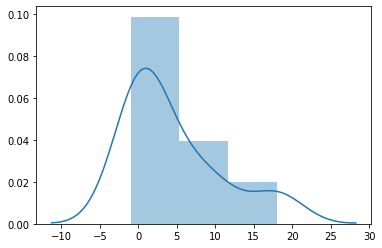

In [15]:
sns.distplot(np.array(data).reshape(-1))
plt.show()

##### instanciando o objeto Normalize

In [16]:
normalizer = Normalizer().fit(data)

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [17]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [18]:
data2 = data2.reshape(-1)

#### valor da média

In [19]:
print(np.mean(data2))

0.4475919008033141


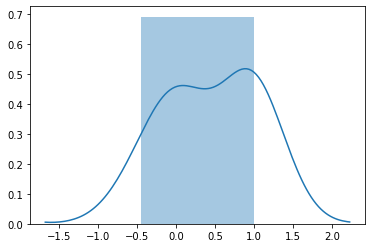

In [20]:
sns.distplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization

In [21]:
data = np.random.normal(size = 50)
print(data)

[ 0.83229072  0.22530132 -0.24434559  1.54230755 -3.48601004  2.85599047
 -0.25882975 -0.33272684  1.56048118  0.72117515 -0.69766644  0.91192336
  0.32465225 -1.19139666  2.18749089  1.26779039  1.21427574 -0.66301743
 -1.01192408  1.23915202 -0.55685485  0.47775835  1.67341042  0.17804383
  0.14327486 -1.19569645 -0.40252709 -1.37166986 -0.22877711 -0.13783235
  0.09196474  0.59632567 -0.12633287 -1.83378803  0.09032108  0.69190696
 -0.0164842  -0.80443629 -1.1071053   1.0954952   0.32085424  0.06509866
 -0.73232621 -0.78763158  1.72503217  1.13967332  0.162236    0.05789349
 -0.91686889  0.56776545]


#### Alterando a forma dos dados para apenas uma dimensão

In [22]:
data = data.reshape(-1,1)

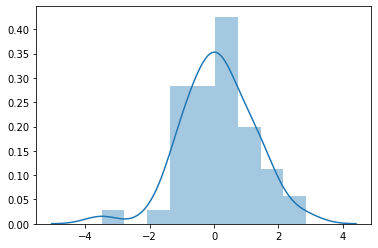

In [23]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [24]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [25]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [26]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[0.68090514]
 [0.58519569]
 [0.51114226]
 [0.79285985]
 [0.        ]
 [1.        ]
 [0.50885841]
 [0.49720639]
 [0.79572545]
 [0.66338456]
 [0.4396631 ]
 [0.69346153]
 [0.60086124]
 [0.36181224]
 [0.89459169]
 [0.74957427]
 [0.74113614]
 [0.44512652]
 [0.39011128]
 [0.74505861]
 [0.46186612]
 [0.62500285]
 [0.81353202]
 [0.57774418]
 [0.57226184]
 [0.36113425]
 [0.48620036]
 [0.33338695]
 [0.51359708]
 [0.52793715]
 [0.56417132]
 [0.64369842]
 [0.52975038]
 [0.26052064]
 [0.56391215]
 [0.65876958]
 [0.5470712 ]
 [0.42282774]
 [0.37510321]
 [0.72240695]
 [0.60026237]
 [0.5599351 ]
 [0.43419798]
 [0.42547749]
 [0.82167168]
 [0.72937291]
 [0.57525162]
 [0.558799  ]
 [0.40509949]
 [0.63919507]]


#### Alterando a forma dos dados para apenas uma dimensão

In [27]:
data_scaled = data_scaled.reshape(-1,1)

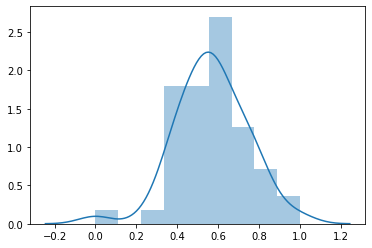

In [28]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [29]:
data = np.random.normal(size = 50)
print(data)

[ 1.06739791e+00  5.54721127e-01  7.69684873e-01  1.39610775e+00
 -1.23977784e+00  1.14123931e+00  1.09899611e+00  6.38238046e-01
 -1.30741606e+00 -3.15093674e-01  1.03386843e-03  5.65995228e-01
 -1.66441009e-01 -1.01320446e+00  1.24629012e-01 -8.31400254e-01
  8.10214470e-01  1.23299138e+00 -4.65778458e-01  9.08489768e-01
  8.75755149e-01  1.98393405e+00 -2.36857293e-01 -4.95918548e-01
  1.21523008e+00 -5.22151030e-01  3.40774687e-02  5.15816142e-01
 -7.43146424e-01 -1.82436935e-01 -5.25592072e-01 -5.11245672e-01
  7.65087083e-02 -8.29063786e-01 -6.12992014e-01 -1.10225327e+00
 -3.84038538e-01  1.31549700e+00 -1.17958397e+00  4.62107714e-01
 -3.05847103e-02  1.53390879e+00  1.03223343e+00  5.47443520e-01
 -8.96333997e-01  9.02321295e-01  6.03888199e-01  2.19845087e+00
  1.85974820e+00  1.97044057e+00]


#### Alterando a forma dos dados para apenas uma dimensão

In [30]:
data = data.reshape(-1,1)

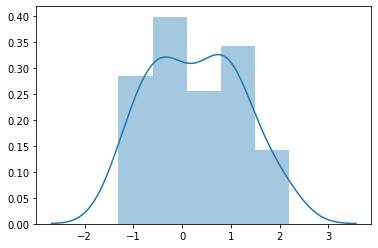

In [31]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [32]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [33]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [34]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[ 0.84743125]
 [ 0.29781941]
 [ 0.52826991]
 [ 1.19982251]
 [-1.62596164]
 [ 0.92659245]
 [ 0.8813059 ]
 [ 0.38735318]
 [-1.69847276]
 [-0.63465994]
 [-0.29575745]
 [ 0.30990574]
 [-0.47529781]
 [-1.38306511]
 [-0.16325807]
 [-1.18816308]
 [ 0.5717194 ]
 [ 1.02495466]
 [-0.79620059]
 [ 0.6770748 ]
 [ 0.64198186]
 [ 1.8299979 ]
 [-0.55078713]
 [-0.82851208]
 [ 1.00591377]
 [-0.85663444]
 [-0.26033327]
 [ 0.25611157]
 [-1.09355113]
 [-0.49244614]
 [-0.86032339]
 [-0.84494342]
 [-0.21484513]
 [-1.18565828]
 [-0.95401993]
 [-1.4785293 ]
 [-0.70857184]
 [ 1.11340428]
 [-1.56143119]
 [ 0.1985338 ]
 [-0.32965394]
 [ 1.34755123]
 [ 0.8097334 ]
 [ 0.2900175 ]
 [-1.25777488]
 [ 0.67046193]
 [ 0.35052865]
 [ 2.05996928]
 [ 1.69686527]
 [ 1.8155323 ]]


#### Alterando a forma dos dados para apenas uma dimensão

In [35]:
data_scaled = data_scaled.reshape(-1,1)

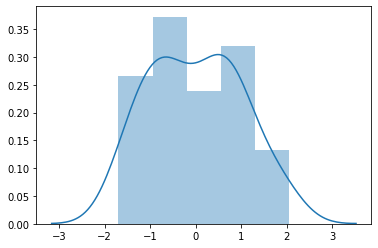

In [36]:
sns.distplot(data_scaled)
plt.show()